In [19]:
import pandas as pd

raw_df = pd.read_csv("./raw_data.csv")

In [28]:
rep = raw_df.METRIC.unique()
raw_df.replace(rep,['Body Fat %','BMI','Calcium','Carbohydrates','Cholesterol','Calories','Fiber','Sugar','Mono-Fat','Potassium','Vitamin C','Iron','Sodium','Fat','Poly-Fat','Protein','Saturated Fat','Exercise Time','Step Count','Weight','Exercise Calories'], inplace=True)
raw_df.METRIC.unique()

array(['Body Fat %', 'BMI', 'Calcium', 'Carbohydrates', 'Cholesterol',
       'Calories', 'Fiber', 'Sugar', 'Mono-Fat', 'Potassium', 'Vitamin C',
       'Iron', 'Sodium', 'Fat', 'Poly-Fat', 'Protein', 'Saturated Fat',
       'Exercise Time', 'Step Count', 'Weight', 'Exercise Calories'],
      dtype=object)

In [4]:
base_df.DATE

0      2024-01-01
1      2024-01-04
2      2024-01-15
3      2024-01-01
4      2024-01-04
          ...    
471    2024-01-20
472    2024-01-22
473    2024-01-23
474    2024-01-24
475    2024-01-25
Name: DATE, Length: 476, dtype: object

In [12]:
last_recorded_weight = base_df.loc[base_df['METRIC'] == 'weight_body_mass'].QTY.iloc[-1]
last_recorded_weight

176.0

In [3]:
import numpy as np
print(np.unique(base_df['METRIC']))

['active_energy' 'apple_exercise_time' 'body_fat_percentage'
 'body_mass_index' 'calcium' 'carbohydrates' 'dietary_cholesterol'
 'dietary_energy' 'dietary_sugar' 'fiber' 'iron' 'monounsaturated_fat'
 'polyunsaturated_fat' 'potassium' 'protein' 'saturated_fat' 'sodium'
 'step_count' 'total_fat' 'vitamin_c' 'weight_body_mass']


In [21]:
calories.DATE

86     2024-01-01
87     2024-01-02
88     2024-01-03
89     2024-01-04
90     2024-01-05
91     2024-01-06
92     2024-01-07
93     2024-01-08
94     2024-01-09
95     2024-01-10
96     2024-01-11
97     2024-01-12
98     2024-01-13
99     2024-01-14
100    2024-01-15
101    2024-01-16
102    2024-01-17
103    2024-01-18
104    2024-01-19
105    2024-01-20
106    2024-01-21
107    2024-01-22
108    2024-01-23
109    2024-01-24
110    2024-01-25
111    2024-01-26
Name: DATE, dtype: object

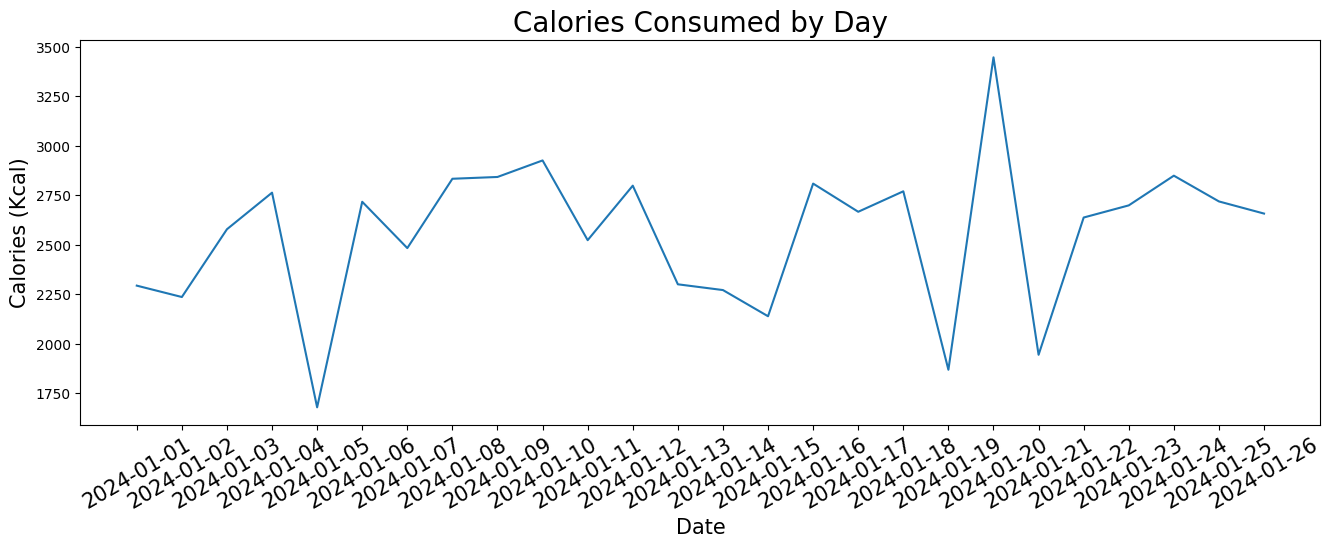

In [23]:

import matplotlib.pyplot as plt


calories = base_df[base_df['METRIC'] == 'dietary_energy']
fig = plt.subplots(figsize=(16, 5))
plt.plot(calories.DATE, calories.QTY);
# plt.plot(calories.QTY);
plt.title('Calories Consumed by Day', fontsize=20);
plt.xlabel('Date', fontsize=15);
plt.ylabel('Calories (Kcal)', fontsize=15);
plt.xticks(rotation=30, fontsize=15);

# Changing the plot resolution - zooming in the period from 15.12.2022 till 15.01.2023
# plt.xlim(pd.Timestamp('2022-12-15'), pd.Timestamp('2023-01-15'))


In [30]:
macros = base_df[base_df['METRIC'].isin(['protein','carbohydrates','total_fat'])].groupby('METRIC').mean()
# macrogroup = macros.groupby('METRIC').mean()
# macros['%'] = (macros['QTY'] / macros['QTY'].sum())*100
macros

,QTY
METRIC,
carbohydrates,279.918442
protein,130.607725
total_fat,98.880878


In [17]:
macros.loc['protein'].iloc[0]

130.60772477665384

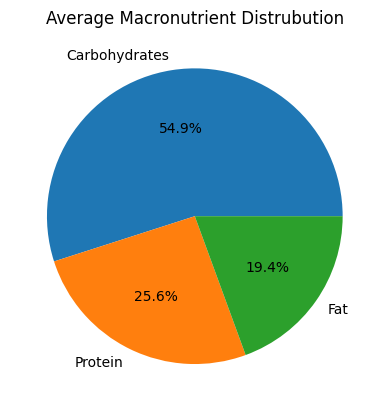

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.title("Average Macronutrient Distrubution")
ax.pie(macros['QTY'], labels=['Carbohydrates', 'Protein', 'Fat'], autopct='%1.1f%%');

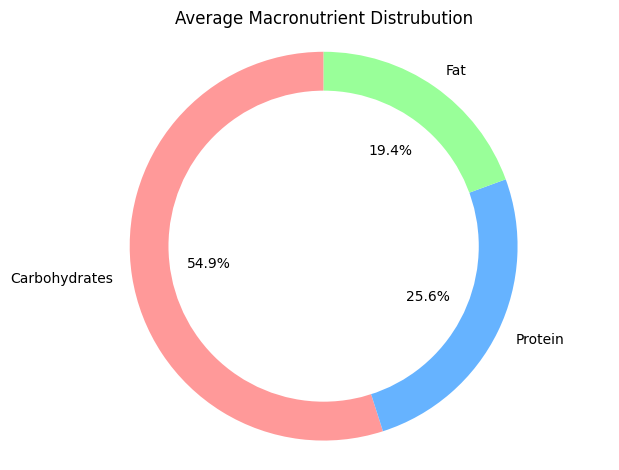

In [34]:

import matplotlib.pyplot as plt
sizes = macros['QTY']
colors = ['#ff9999','#66b3ff','#99ff99']
fig1, ax1 = plt.subplots()
plt.title("Average Macronutrient Distrubution")
ax1.pie(sizes, colors = colors, labels=['Carbohydrates', 'Protein', 'Fat'], autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [18]:
activity = base_df[base_df['METRIC'].isin(['active_energy', 'apple_exercise_time'])]
activity

avg_exercise_mins = activity

,METRIC,UNITS,DATE,QTY
398,apple_exercise_time,min,2024-01-01,65.000
399,apple_exercise_time,min,2024-01-02,9.000
400,apple_exercise_time,min,2024-01-03,45.000
401,apple_exercise_time,min,2024-01-04,35.000
402,apple_exercise_time,min,2024-01-05,55.000
403,apple_exercise_time,min,2024-01-06,53.000
404,apple_exercise_time,min,2024-01-07,18.000
405,apple_exercise_time,min,2024-01-08,36.000
406,apple_exercise_time,min,2024-01-09,34.000
407,apple_exercise_time,min,2024-01-10,45.000
